In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 12 21:52:22 2020
Last Revision 07 May 2020 : kristerjazz

@author: cvcab, kristerjazz.urog
"""

import geopandas as gps
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

import pandas as pd
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder

## Dendogram colors still doesnt map to `NCR Map` colors

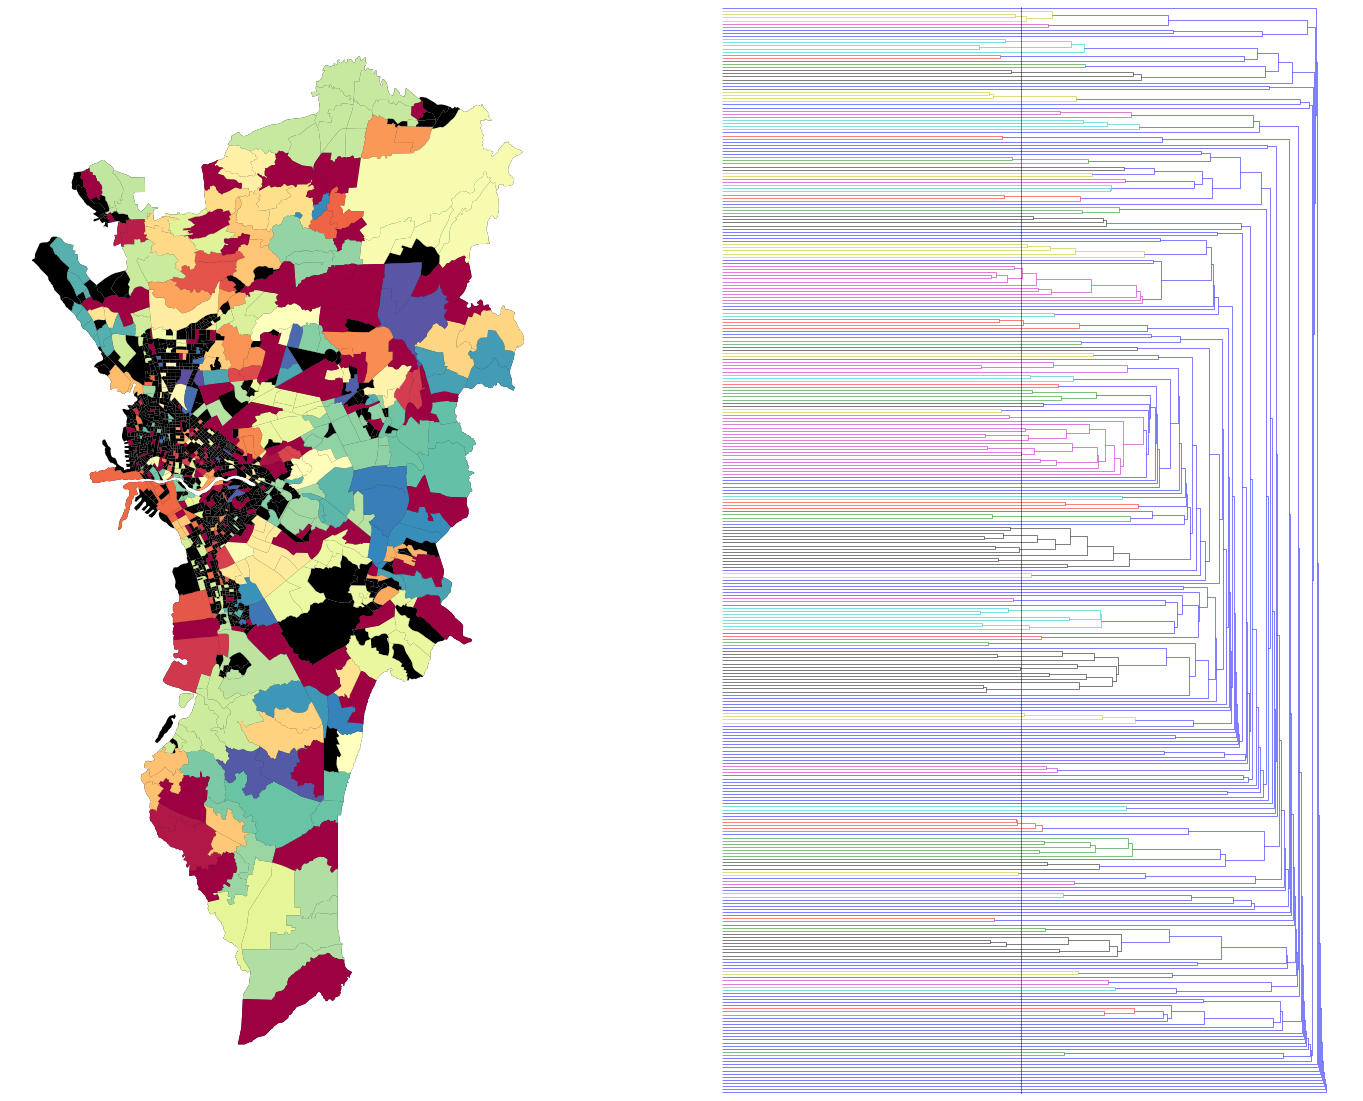

In [2]:
#override default linewidth for the dendrogram
mpl.rcParams['lines.linewidth'] = 0.5

#read the saved shapefile
NCR = gps.read_file('NCR2.shp')
Z = np.load('linkage.npy')

#for each step in the dendrogram
for col in range(300,301):#only column 1 for now
    fig, axes = plt.subplots(1, 2, figsize=(25,20))
    ax1, ax2 = axes
    #convert the step to a string (column headers are string-integers)
    i = str(col)
    
    # make entire map (including nan) black
    NCR.plot(ax = ax1, color="k", zorder=1)
    
    #obtain unique list of entries except NaN
    clustered_ncr = NCR[NCR[i].notna()]
    cluster_value = LabelEncoder().fit_transform(clustered_ncr[i])
    num_cluster = len(set(cluster_value))
    
    #get color samples based on clust_number
    colors = plt.cm.rainbow(np.linspace(0,1,num_cluster))
    cmap = plt.cm.get_cmap('Spectral')
    colors = np.array([cmap(x) for x in np.linspace(0,1, num_cluster)])
    
#     #overlay map with nans transparent (to show the black nans underneath)
    clustered_ncr.plot(ax=ax1, color=colors[cluster_value])

    dn = sch.dendrogram(Z, truncate_mode='lastp', p=350, orientation='right',
                        ax=ax2)
    ax2.axvline(x=col, c='k')
    #turn-off axes and save the image
    ax1.set_axis_off()
    ax2.set_axis_off()
    # ax2.set_yticklabels(labels = ax2.get_yticklabels(), fontsize=5)
    # plt.axis('off')
#     plt.tight_layout()
#     plt.savefig(i + '.png', dpi=300)
#     plt.clf()
#     plt.close()
